In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
df = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


TODO #1

In [3]:
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


TODO #2

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007248 entries, 0 to 6007247
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline   

TODO #3

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007248 entries, 0 to 6007247
Data columns (total 15 columns):
 #   Column                                              Dtype         
---  ------                                              -----         
 0   country_region_code                                 object        
 1   country_region                                      object        
 2   sub_region_1                                        object        
 3   sub_region_2                                        object        
 4   metro_area                                          object        
 5   iso_3166_2_code                                     object        
 6   census_fips_code                                    float64       
 7   place_id                                            object        
 8   date                                                datetime64[ns]
 9   retail_and_recreation_percent_change_from_baseline  float64       
 10  grocery_and_pharma

TODO #4

In [7]:
df.isnull().sum()

country_region_code                                      3821
country_region                                              0
sub_region_1                                           100643
sub_region_2                                           987910
metro_area                                            5974558
iso_3166_2_code                                       4944942
census_fips_code                                      4741251
place_id                                                10877
date                                                        0
retail_and_recreation_percent_change_from_baseline    2265695
grocery_and_pharmacy_percent_change_from_baseline     2414476
parks_percent_change_from_baseline                    3137458
transit_stations_percent_change_from_baseline         2997318
workplaces_percent_change_from_baseline                240620
residential_percent_change_from_baseline              2436601
dtype: int64

In [8]:
df_subset = df[(df['country_region'].eq("India")) & (df['sub_region_1'].eq("Gujarat")) & (df['sub_region_2'].eq("Vadodara"))]
df_subset

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2656337,IN,India,Gujarat,Vadodara,NaN,NaN,NaN,ChIJ2Zj8v5XFXzkRz_cujNn9aiw,2020-02-15,-5.0,-4.0,1.0,1.0,2.0,0.0
2656338,IN,India,Gujarat,Vadodara,NaN,NaN,NaN,ChIJ2Zj8v5XFXzkRz_cujNn9aiw,2020-02-16,-3.0,-6.0,-5.0,1.0,-2.0,0.0
2656339,IN,India,Gujarat,Vadodara,NaN,NaN,NaN,ChIJ2Zj8v5XFXzkRz_cujNn9aiw,2020-02-17,-3.0,1.0,-1.0,0.0,3.0,0.0
2656340,IN,India,Gujarat,Vadodara,NaN,NaN,NaN,ChIJ2Zj8v5XFXzkRz_cujNn9aiw,2020-02-18,-2.0,1.0,0.0,2.0,2.0,0.0
2656341,IN,India,Gujarat,Vadodara,NaN,NaN,NaN,ChIJ2Zj8v5XFXzkRz_cujNn9aiw,2020-02-19,-2.0,2.0,3.0,-1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656837,IN,India,Gujarat,Vadodara,NaN,NaN,NaN,ChIJ2Zj8v5XFXzkRz_cujNn9aiw,2021-06-29,-31.0,-4.0,-39.0,-10.0,-18.0,10.0
2656838,IN,India,Gujarat,Vadodara,NaN,NaN,NaN,ChIJ2Zj8v5XFXzkRz_cujNn9aiw,2021-06-30,-29.0,-4.0,-41.0,-10.0,-16.0,8.0
2656839,IN,India,Gujarat,Vadodara,NaN,NaN,NaN,ChIJ2Zj8v5XFXzkRz_cujNn9aiw,2021-07-01,-27.0,2.0,-38.0,-10.0,-15.0,10.0
2656840,IN,India,Gujarat,Vadodara,NaN,NaN,NaN,ChIJ2Zj8v5XFXzkRz_cujNn9aiw,2021-07-02,-27.0,5.0,-35.0,-10.0,-12.0,10.0


TODO #5

In [9]:
df_subset.drop(columns=['country_region_code','country_region','sub_region_1','sub_region_2','metro_area','iso_3166_2_code','census_fips_code','place_id','date']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 2656337 to 2656841
Data columns (total 6 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   retail_and_recreation_percent_change_from_baseline  505 non-null    float64
 1   grocery_and_pharmacy_percent_change_from_baseline   505 non-null    float64
 2   parks_percent_change_from_baseline                  505 non-null    float64
 3   transit_stations_percent_change_from_baseline       505 non-null    float64
 4   workplaces_percent_change_from_baseline             505 non-null    float64
 5   residential_percent_change_from_baseline            505 non-null    float64
dtypes: float64(6)
memory usage: 27.6 KB


TODO #6 & TODO #7

In [10]:
days_since_lockdown = (df_subset['date'] - pd.to_datetime('2020-03-25 00:00:00')).dt.days.values

TODO #8

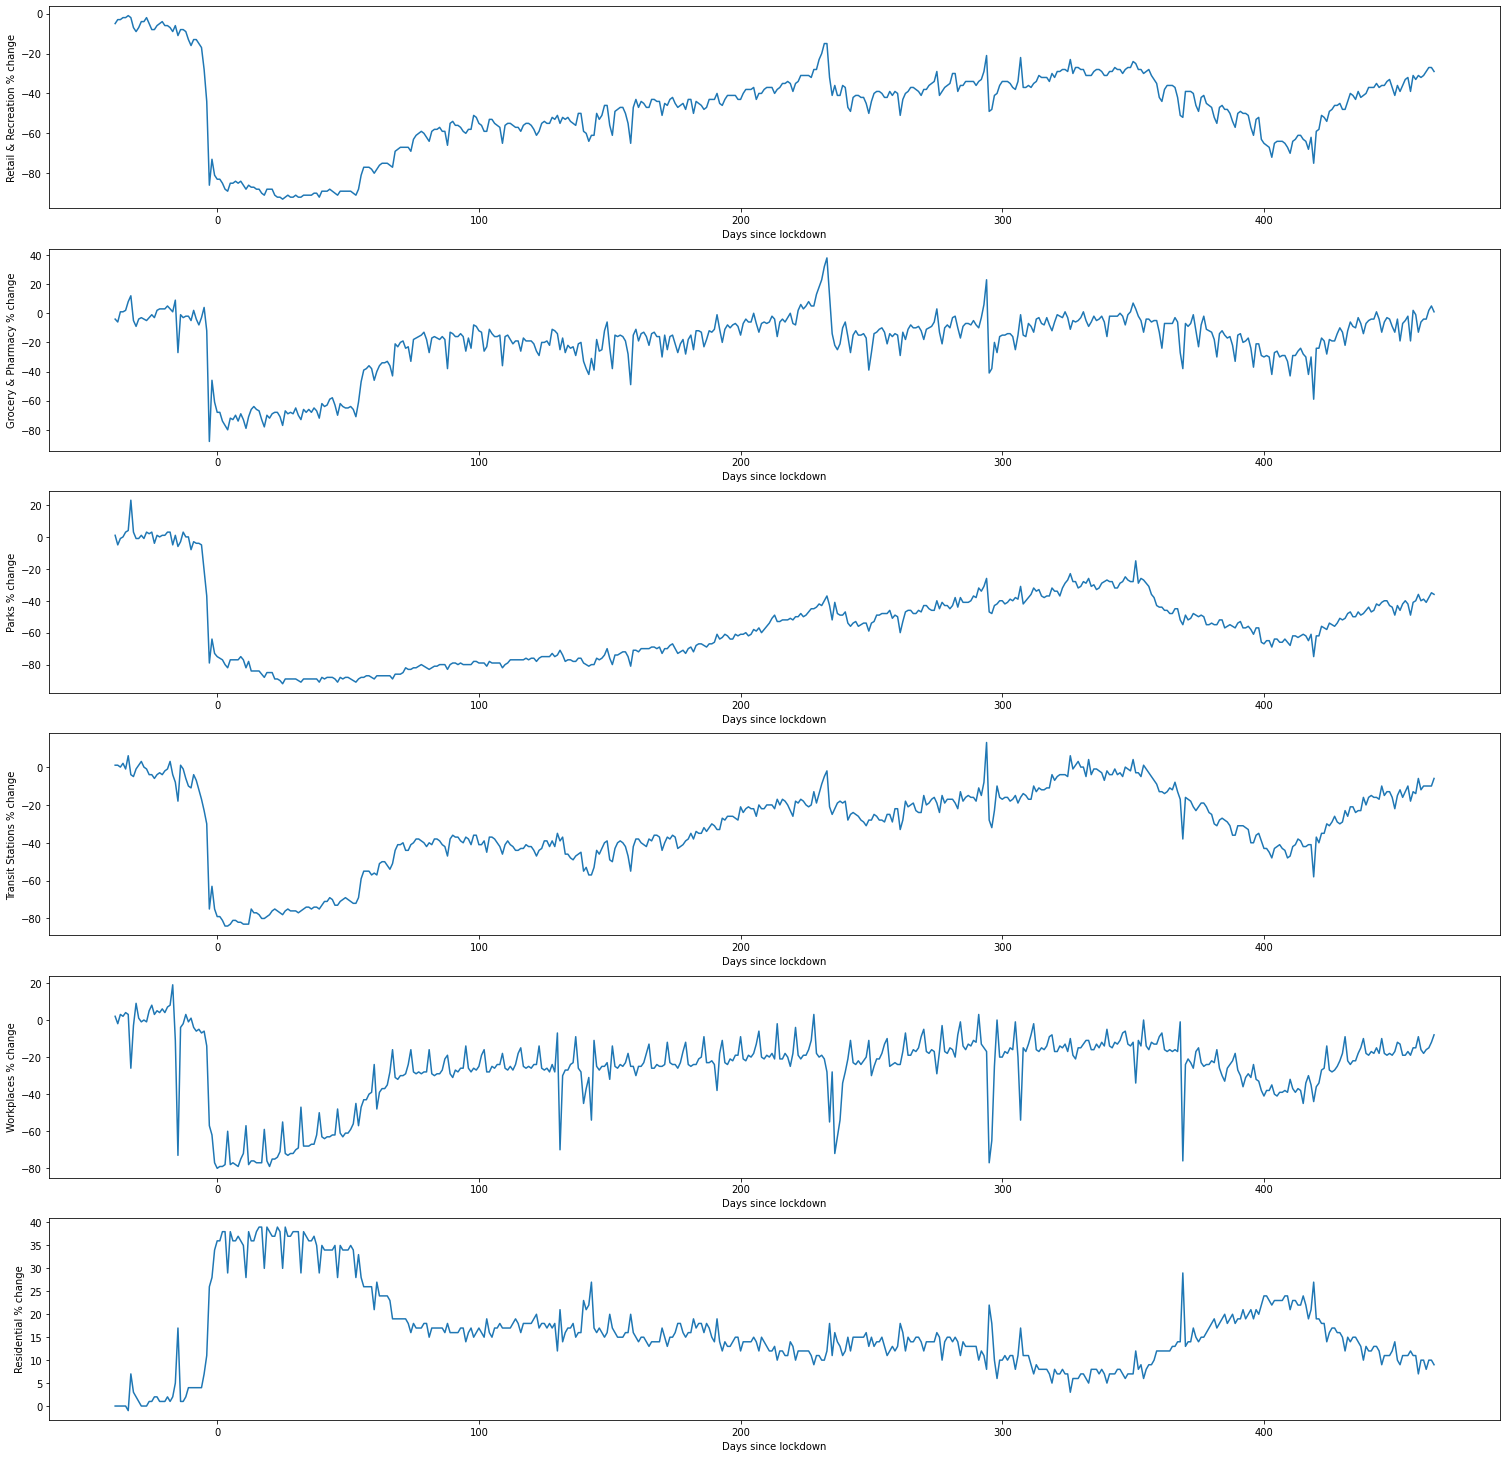

In [11]:
f, axes = plt.subplots(6, 1,figsize=(26,26))

sns.lineplot(x=days_since_lockdown,y=df_subset['retail_and_recreation_percent_change_from_baseline'],ax=axes[0])
sns.lineplot(x=days_since_lockdown,y=df_subset['grocery_and_pharmacy_percent_change_from_baseline'],ax=axes[1])
sns.lineplot(x=days_since_lockdown,y=df_subset['parks_percent_change_from_baseline'],ax=axes[2])
sns.lineplot(x=days_since_lockdown,y=df_subset['transit_stations_percent_change_from_baseline'],ax=axes[3])
sns.lineplot(x=days_since_lockdown,y=df_subset['workplaces_percent_change_from_baseline'],ax=axes[4])
sns.lineplot(x=days_since_lockdown,y=df_subset['residential_percent_change_from_baseline'],ax=axes[5])

y_labels = ['Retail & Recreation','Grocery & Pharmacy','Parks','Transit Stations','Workplaces','Residential']
for i,ax in enumerate(axes):
  ax.set_ylabel(f'{y_labels[i]} % change')
  ax.set_xlabel('Days since lockdown')

TODO #9

In [12]:
df_vax = pd.read_csv('https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/us_state_vaccinations.csv')
df_vax.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN


In [13]:
df_vax.shape

(11528, 14)

In [14]:
df_vax['date'] = pd.to_datetime(df_vax['date'])
df_vax_subset = df_vax[df_vax['location'].eq('New York State')]
df_vax_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 7080 to 7256
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 177 non-null    datetime64[ns]
 1   location                             177 non-null    object        
 2   total_vaccinations                   171 non-null    float64       
 3   total_distributed                    171 non-null    float64       
 4   people_vaccinated                    171 non-null    float64       
 5   people_fully_vaccinated_per_hundred  170 non-null    float64       
 6   total_vaccinations_per_hundred       171 non-null    float64       
 7   people_fully_vaccinated              170 non-null    float64       
 8   people_vaccinated_per_hundred        171 non-null    float64       
 9   distributed_per_hundred              171 non-null    float64       
 10  daily_vacc

In [15]:
url_cases = 'https://github.com/nytimes/covid-19-data/raw/master/us-states.csv'
df_cases = pd.read_csv(url_cases)
df_cases.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [16]:
df_cases.shape

(27074, 5)

In [17]:
df_cases['date'] = pd.to_datetime(df_cases['date'])
df_cases_subset = df_cases[df_cases['state'].eq('New York')]
df_cases_subset.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


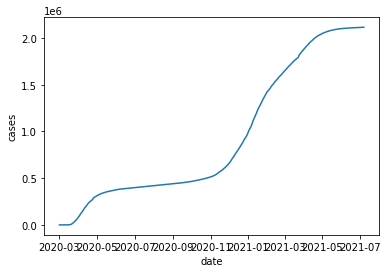

In [18]:
_ = sns.lineplot(x=df_cases_subset['date'], y=df_cases_subset['cases'])
